Dataset shape: (100, 4)

First 5 rows:
   word_count  has_keywords  read_time  category
0         142             0          3      tech
1        1043             0          6  business
2         442             1         12    sports
3        1449             1         13      tech
4        1937             1         10      tech

Column names: ['word_count', 'has_keywords', 'read_time', 'category']

Category distribution:
category
tech        38
business    31
sports      31
Name: count, dtype: int64

Accuracy: 0.3

Classification Report:
              precision    recall  f1-score   support

    business       0.00      0.00      0.00         6
      sports       0.40      0.67      0.50         6
        tech       0.22      0.25      0.24         8

    accuracy                           0.30        20
   macro avg       0.21      0.31      0.25        20
weighted avg       0.21      0.30      0.24        20



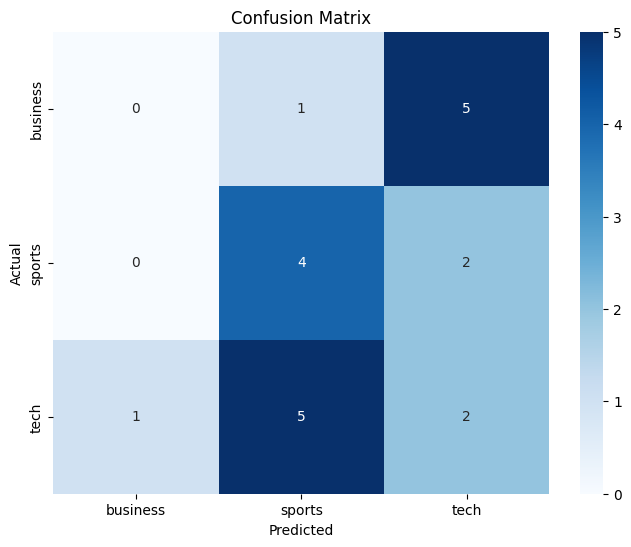


Example Prediction: business


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [5]:
# Install required libraries
!pip install -q pandas scikit-learn numpy matplotlib seaborn joblib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# Load the dataset
df = pd.read_csv('/news_articles.csv')

# Display dataset info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:", df.columns.tolist())
print("\nCategory distribution:")
print(df['category'].value_counts())

# Drop rows with missing values in feature columns
df = df.dropna(subset=['word_count', 'has_keywords', 'read_time', 'category'])

# Encode the target category
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Features and target
X = df[['word_count', 'has_keywords', 'read_time']]
y = df['category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save model and encoders
dump(model, 'news_metadata_classifier.joblib')
dump(label_encoder, 'label_encoder.joblib')

# Prediction function
def predict_category(word_count, has_keywords, read_time):
    features = np.array([[word_count, has_keywords, read_time]])
    prediction = model.predict(features)
    return label_encoder.inverse_transform(prediction)[0]

# Example prediction
print("\nExample Prediction:", predict_category(1200, 1, 8))
